In [113]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Reading the CSV file
df = pd.read_csv("/content/iris_data.csv")
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


TO know the dataset information we will use the shape parameter

In [114]:
df.shape

(150, 5)

Here we can see there are 150 rows and 5 columns are present in dataset.

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   149 non-null    float64
 2   Petal.Length  149 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


information about the column data type

In [116]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,149.000000,149.000000,150.000000
mean,9.407333,3.057718,3.773826,1.199333
std,43.621311,0.437311,1.760543,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,540.000000,4.400000,6.900000,2.500000


the describe parameter gives us basic statistical computation of dataset

In [117]:
df.value_counts("Species")

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [118]:
df[df.isnull().any(axis=1)]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
12,4.8,NaN,NaN,0.1,setosa


Here we have checked the equal number of species are present or not

In [119]:
df1 = df.loc[df['Species']=='setosa']
df1.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,50.000000,49.000000,49.000000,50.000000
mean,15.698000,3.436735,1.463265,0.246000
std,75.661514,0.377874,0.175231,0.105386
min,4.300000,2.300000,1.000000,0.100000
25%,4.800000,3.200000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.200000,3.700000,1.600000,0.300000
max,540.000000,4.400000,1.900000,0.600000


In [120]:
df.at[12,'Sepal.Width'] = 3.4
df.at[12,'Petal.Length'] = 1.4

In [121]:
df.iloc[12]

Sepal.Length       4.8
Sepal.Width        3.4
Petal.Length       1.4
Petal.Width        0.1
Species         setosa
Name: 12, dtype: object

Plotting the countplot of the each species

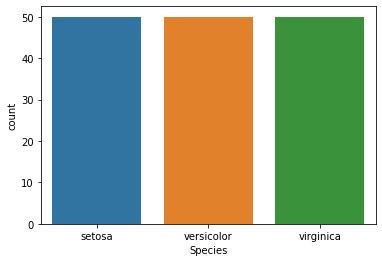

In [122]:
sns.countplot(x='Species', data=df, )
plt.show()

Here we will identify how the categorical values are distributed with other numerical values.

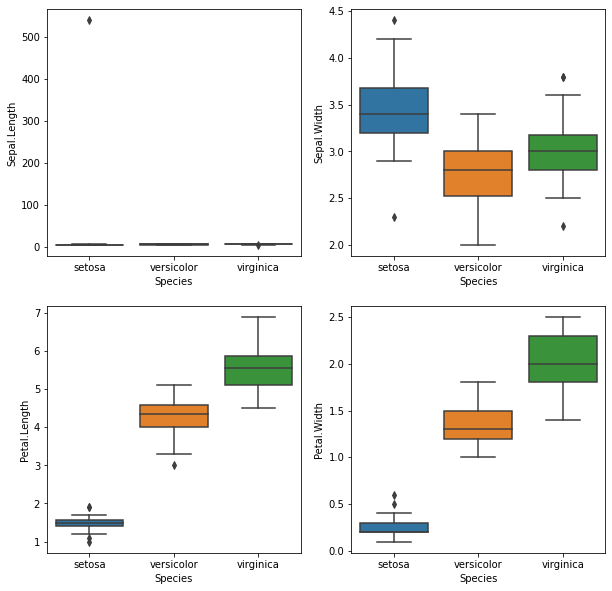

In [123]:
def graph(y):
    sns.boxplot(x="Species", y=y, data=df)
 
plt.figure(figsize=(10,10))
     
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('Sepal.Length')
 
plt.subplot(222)
graph('Sepal.Width')
 
plt.subplot(223)
graph('Petal.Length')
 
plt.subplot(224)
graph('Petal.Width')
 
plt.show()

Setosa has the smallest features and less distributed with one otlier which 540.
Now we will remove that outlier.


In [124]:
df = df.loc[df['Sepal.Length'] != 540]

We will see the relationship between the sepal length and sepal width and also between petal length and petal width.

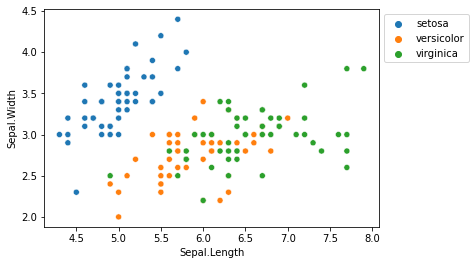

In [125]:
sns.scatterplot(x='Sepal.Length', y='Sepal.Width',
                hue='Species', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

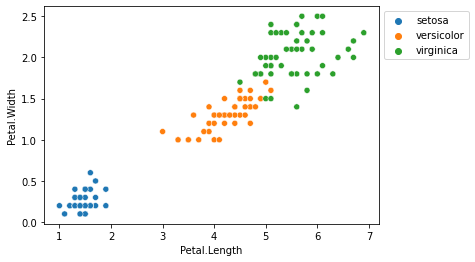

In [126]:
sns.scatterplot(x='Petal.Length', y='Petal.Width',
                hue='Species', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

We can observe that - 
1. Species Setosa has smaller petal lengths and widths.
2. Versicolor Species lies in the middle of the other two species in terms of petal length and width
3. Species Virginica has the largest of petal lengths and widths.

For multivariate analysis, we can plot the relationship in column by using pairplot

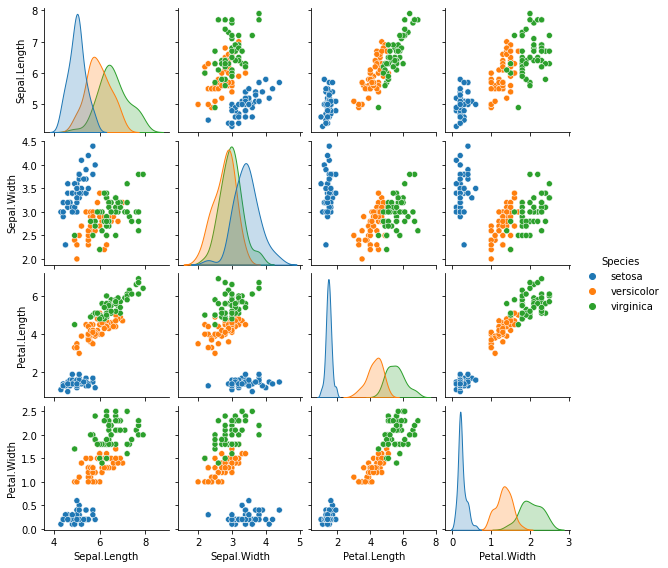

In [127]:
sns.pairplot(df, hue='Species', height=2)

With the help of pairplot we can see that the species Setosa has the smallest petal width and length. Also in terms of speal lenth and width, the smallest sepal length and largest sepal width.

Distplot is used basically for the univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

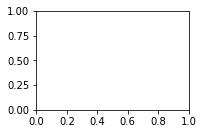

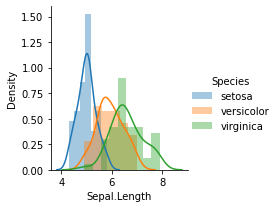

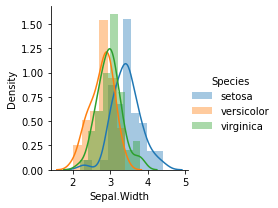

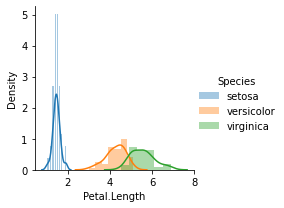

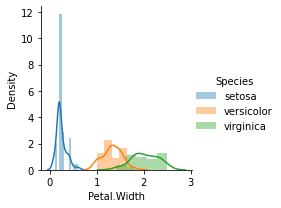

In [132]:

plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "Sepal.Length").add_legend()
 
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "Sepal.Width").add_legend()
 
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "Petal.Length").add_legend()
 
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "Petal.Width").add_legend()
 
plt.show()

By looking at above graphs we can easily classify setosa by considering only petal length.
for classification of versicolor and virginica,
we will consider petal length and petal width as its overlapping


In [131]:
petal_length = float(input("Input Petal Length: "))


if petal_length <= 2.2:
    print("Flower is Setosa")
elif petal_length > 2.2 and petal_length <= 4.8:
    print("Flower is Versicolor")
elif petal_length > 4.8 and petal_length <= 7.9:
    print("Flower is Virginica")

Input Petal Length: 6.7
Flower is Virginica
